In [83]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
import numpy as np
# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [84]:
df = pd.read_csv("Holiday_Package.csv")
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [85]:
df = df.drop(['Unnamed: 0'], axis=1)


In [86]:
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [87]:
df.shape

(872, 7)

In [88]:
df.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [ ]:
there are no missing values

In [89]:
df.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


In [ ]:
The count of attribute are all same.Indicates no possible missing values.
The mean and median are not exactly normal. 
The range between 75% and max value is okay, the range is not too much.


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [ ]:
The info contains 6 attributes with non-null values. The attributes Holiday_package, Salary,age, educ, noofyounf childrenandnoof older children  are int data types.
The attribute Holiday paackage and foreign are object data type
There are no missing values. The indexing is from 0 to 871. The total entries are 872.


In [91]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [92]:
# unique values for categorical variables
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




In [93]:
df[['Salary' ,'age', 'educ', 'no_young_children', 'no_older_children'
       ]].nunique()

Salary               864
age                   43
educ                  20
no_young_children      4
no_older_children      7
dtype: int64

In [94]:
num = []
cat = [] 
for i in df.columns:
    if df[i].dtypes != 'int64'and df[i].dtypes != 'float64':
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['Holliday_Package', 'foreign']
['Salary', 'age', 'educ', 'no_young_children', 'no_older_children']


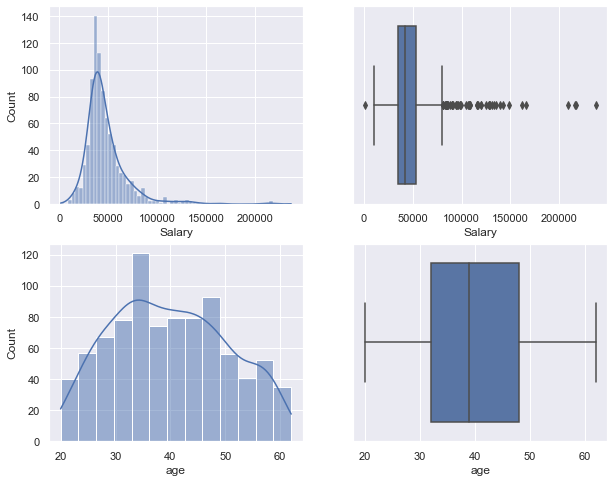

In [95]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(df['Salary'], kde=True, ax=axes[0][0])
sns.boxplot(x='Salary', data=df, ax=axes[0][1])
sns.histplot(df['age'] , kde=True, ax=axes[1][0])
sns.boxplot(x='age', data=df , ax=axes[1][1])
plt.show()

In [96]:
import scipy.stats as stats

In [97]:
stats.skew(df.Salary)

3.097874889446042

In [98]:
stats.skew(df.age)

0.14616002999431685

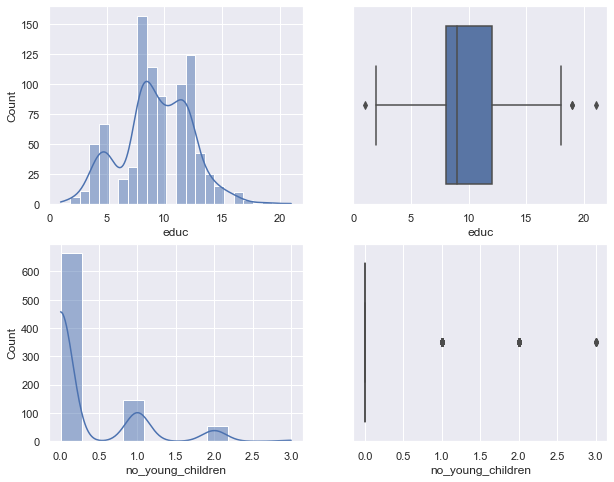

In [99]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(df['educ'], kde=True, ax=axes[0][0])
sns.boxplot(x='educ', data=df, ax=axes[0][1])
sns.histplot(df['no_young_children'] , kde=True, ax=axes[1][0])
sns.boxplot(x='no_young_children', data=df , ax=axes[1][1])
plt.show()

In [100]:
stats.skew(df.educ)

-0.04542316723258808

In [101]:
stats.skew(df.no_young_children)

1.9431646149708026

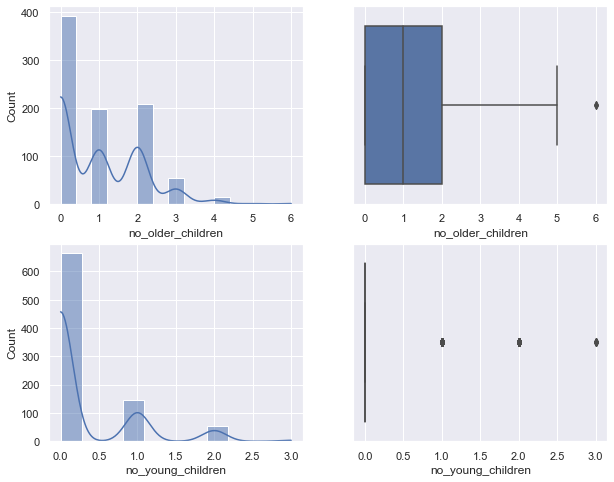

In [102]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(df['no_older_children'], kde=True, ax=axes[0][0])
sns.boxplot(x='no_older_children', data=df, ax=axes[0][1])
sns.histplot(df['no_young_children'] , kde=True, ax=axes[1][0])
sns.boxplot(x='no_young_children', data=df , ax=axes[1][1])
plt.show()

In [103]:
stats.skew(df.no_older_children)

0.9523097178138935

In [ ]:
categorical

In [104]:
df['Holliday_Package'].value_counts

<bound method IndexOpsMixin.value_counts of 0       no
1      yes
2       no
3       no
4       no
      ... 
867     no
868    yes
869     no
870    yes
871     no
Name: Holliday_Package, Length: 872, dtype: object>

In [105]:
df['foreign'].value_counts

<bound method IndexOpsMixin.value_counts of 0       no
1       no
2       no
3       no
4       no
      ... 
867    yes
868    yes
869    yes
870    yes
871    yes
Name: foreign, Length: 872, dtype: object>

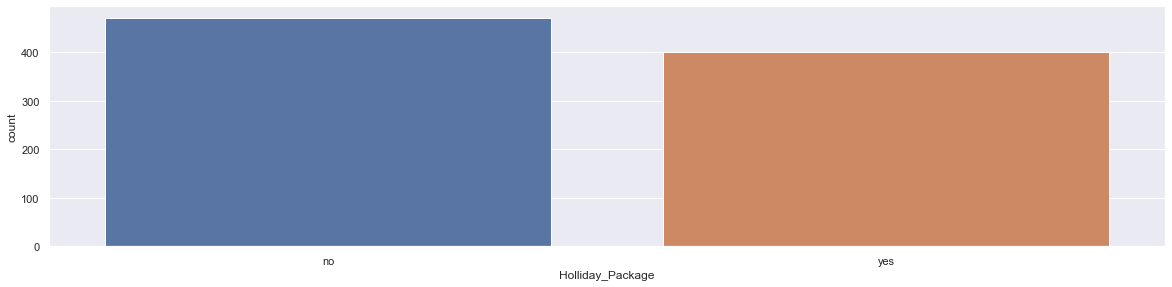

In [106]:
plt.subplots(figsize=(20,15))
#plt.figure(figsize = (15,10))
plt.subplot(3,1,1)
sns.countplot(x=df['Holliday_Package'])

import warnings
warnings.filterwarnings('ignore')

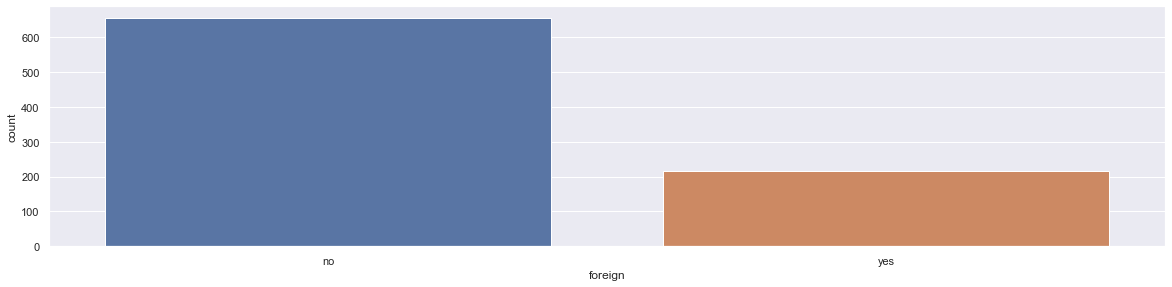

In [107]:
plt.subplots(figsize=(20,15))
#plt.figure(figsize = (15,10))
plt.subplot(3,1,1)
sns.countplot(x=df['foreign'])

import warnings
warnings.filterwarnings('ignore')

In [108]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts())
    plt.figure()
    plt.subplots(figsize=(25,5))
    df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")

In [109]:
df_cat = df.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['Holliday_Package', 'foreign']

Details of Holliday_Package
----------------------------------------------------------------
no     471
yes    401
Name: Holliday_Package, dtype: int64


<Figure size 432x288 with 0 Axes>

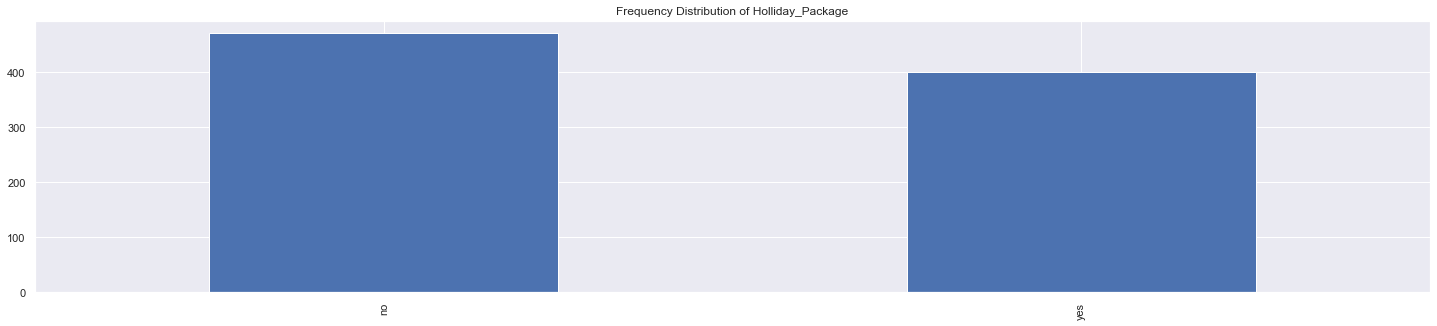

       
Details of foreign
----------------------------------------------------------------
no     656
yes    216
Name: foreign, dtype: int64


<Figure size 432x288 with 0 Axes>

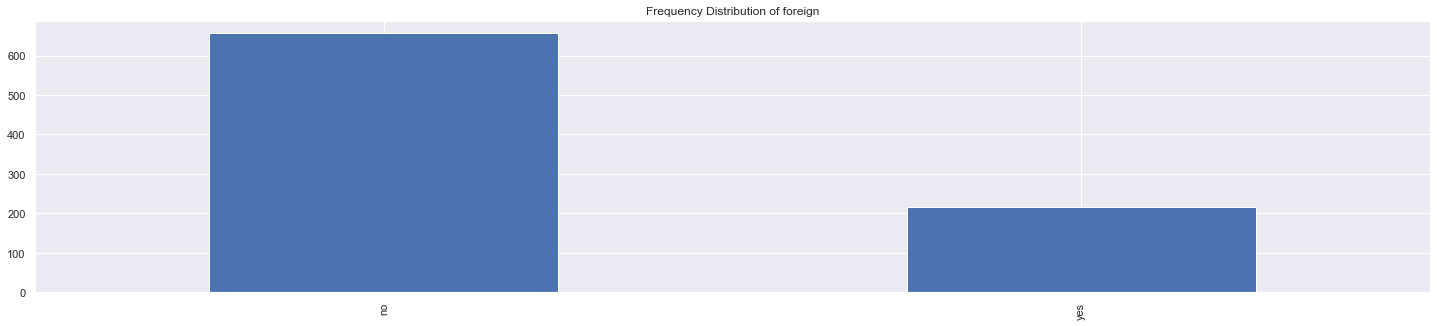

In [110]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

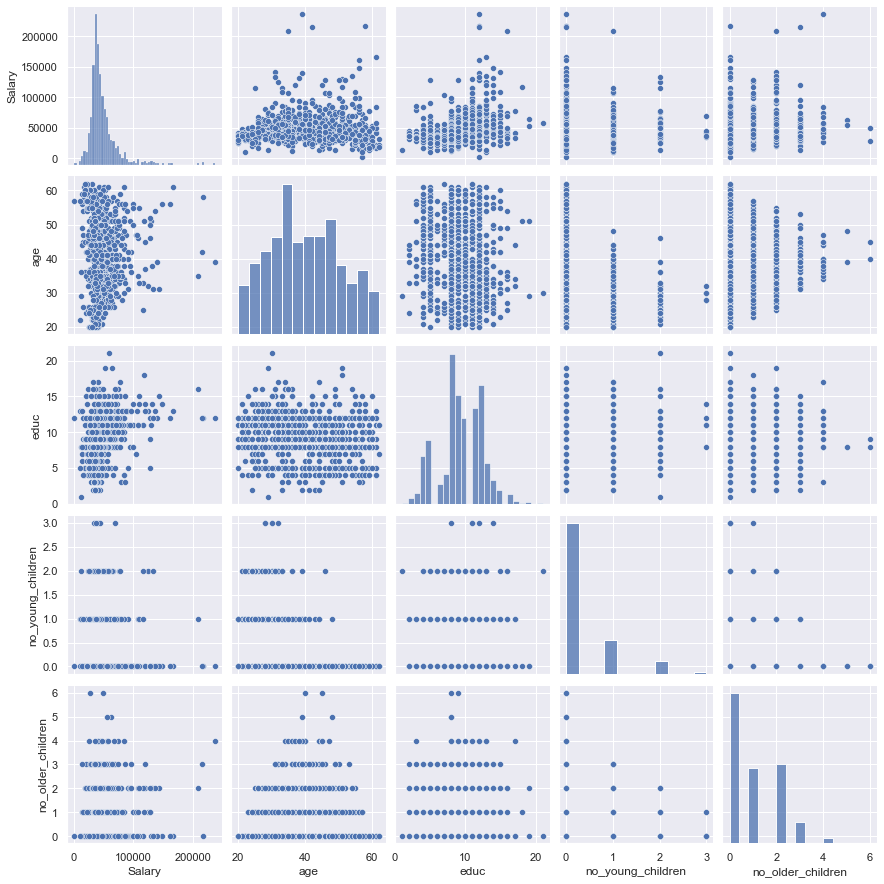

In [111]:
sns.set()
sns.pairplot(df)
plt.show()

In [112]:
corr = df.corr()
corr

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.071709,0.326540,-0.029664,0.113772
age,0.071709,1.000000,-0.149294,-0.519093,-0.116205
educ,0.326540,-0.149294,1.000000,0.098350,-0.036321
no_young_children,-0.029664,-0.519093,0.098350,1.000000,-0.238428
no_older_children,0.113772,-0.116205,-0.036321,-0.238428,1.000000


<AxesSubplot:>

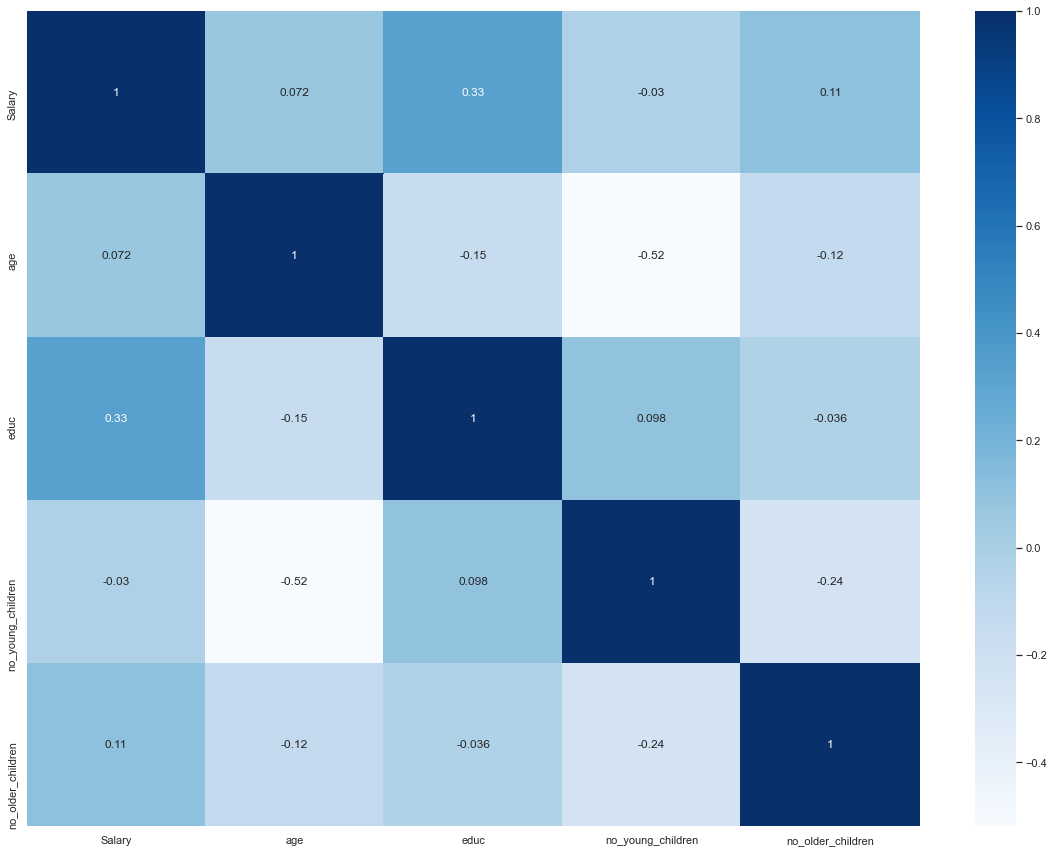

In [113]:
plt.subplots(figsize=(20,15))
sns.heatmap(corr, annot=True, cmap='Blues')

In [114]:
df[cat]

,Holliday_Package,foreign
0,no,no
1,yes,no
2,no,no
3,no,no
4,no,no
...,...,...
867,no,yes
868,yes,yes
869,no,yes
870,yes,yes


In [115]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['Holliday_Package']= label_encoder.fit_transform(df['Holliday_Package'])
 
df['Holliday_Package'].unique()

array([0, 1])

In [116]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['foreign']= label_encoder.fit_transform(df['foreign'])
 
df['foreign'].unique()

array([0, 1])

In [117]:
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Holliday_Package   872 non-null    int32
 1   Salary             872 non-null    int64
 2   age                872 non-null    int64
 3   educ               872 non-null    int64
 4   no_young_children  872 non-null    int64
 5   no_older_children  872 non-null    int64
 6   foreign            872 non-null    int32
dtypes: int32(2), int64(5)
memory usage: 41.0 KB


In [119]:
df.Salary.value_counts()

39460     2
33357     2
46195     2
40270     2
44280     2
         ..
19845     1
42369     1
128381    1
38268     1
61441     1
Name: Salary, Length: 864, dtype: int64

In [ ]:
Treating the outliers.

In [145]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [146]:
lr,ur=remove_outlier(df['Salary'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df['Salary']=np.where(df['Salary']>ur,ur,df['Salary'])
df['Salary']=np.where(df['Salary']<lr,lr,df['Salary'])

Lower Range : 8105.75 
Upper Range : 80687.75


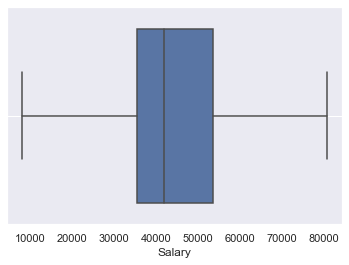

In [147]:
cols = ['Salary']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.grid()
    plt.show();

In [152]:
lr,ur=remove_outlier(df['educ'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df['educ']=np.where(df['educ']>ur,ur,df['educ'])
df['educ']=np.where(df['educ']<lr,lr,df['educ'])

Lower Range : 2.0 
Upper Range : 18.0


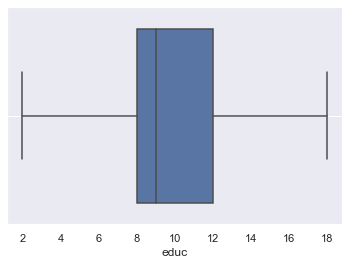

In [153]:
cols = ['educ']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.grid()
    plt.show();

In [ ]:
lr,ur=remove_outlier(df['educ'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df['educ']=np.where(df['educ']>ur,ur,df['educ'])
df['educ']=np.where(df['educ']<lr,lr,df['educ'])

In [ ]:
cols = ['educ']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.grid()
    plt.show();

In [ ]:
Taking salary as the targetor dependent variable to split the data

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import MinMaxScaler

In [ ]:
Drop the dependent variable from the Data Set and store it seperately. Then split your data into train and test data sets. The test data size should be 30% of the total data. Use random_state=7.

In [66]:
Qualitative: Binary

In [ ]:
 variable with only two possible categorical values are called binary variables. Common examples of values in a binary field are Yes and No, 1 and 0, etc.

 

For the R tool to handle it properly, a binary variable needs to be set as a non-numeric (preferably string) data type. If the data type is left as numeric, then models will interpret the target variable as a continuous variable (see below).  Your target field should only contain two discrete values, 1 and 0, which is why we want to ensure the variable is non-numeric. 

In [ ]:
Formulate a logistic regression model on the train data.

In [193]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [ ]:
 Get the Model Score

In [194]:
model_score = model.score(X_test, y_test)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.4351145038167939


In [ ]:
Generate the Confusion Matrix and Classification Report. What are your observations and recommendations?

In [195]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, y_predict))

Confusion Matrix 
 [[ 0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 10  6  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  9  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 11  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 38  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20 14  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 12 10 10  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  4 27  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 29  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  3  3  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  3  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]] 

Classification Report 
               precision    recall  f

In [ ]:
AUC and ROC for the training data

In [185]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [196]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [ ]:
Build the LDA algorithm without scaling the predictor variables and use this model to predict on the test set and compute the confusion matrix.

In [197]:
clf = LinearDiscriminantAnalysis()

In [199]:
model1=clf.fit(X_train,y_train)
model1

LinearDiscriminantAnalysis()

In [200]:
# Predict it
pred_class = model.predict(X_test)

In [201]:
print(classification_report(y_test, pred_class))

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         3
         3.0       0.00      0.00      0.00         4
         4.0       0.42      0.59      0.49        17
         5.0       0.47      0.56      0.51        16
         6.0       0.00      0.00      0.00         7
         7.0       0.00      0.00      0.00        12
         8.0       0.53      0.90      0.67        42
         9.0       0.45      0.41      0.43        34
        10.0       0.83      0.31      0.45        32
        11.0       0.29      0.12      0.17        33
        12.0       0.39      0.97      0.55        30
        13.0       0.00      0.00      0.00        14
        14.0       0.00      0.00      0.00         7
        15.0       0.00      0.00      0.00         6
        16.0       0.00      0.00      0.00         1
        17.0       0.00      0.00      0.00         2
        18.0       0.00      0.00      0.00         2

    accuracy              